In [38]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [8]:
# return pure sine wave(amp, freq, phase, cycle), continuous sine wave and discrete sine wave, 
# using the F/fdesired=100 to pretend the continuous sine wave
# set the fs=102400 in the discrete sine wave
def sin(amp=1, freq=5000, phase=0, cycles=10):
    phase = phase*180/np.pi
    con_F = 100*freq
    con_t = np.arange(0, con_F//freq*cycles)/con_F
    dis_F = 102400
    dis_t = np.arange(0, dis_F//freq*cycles)/dis_F
    con_sin = amp*np.sin(np.pi*2*freq*con_t+phase)
    dis_sin = amp*np.sin(np.pi*2*freq*dis_t+phase)
    return con_t, con_sin, dis_t, dis_sin

In [41]:
fs = 102400
freq = 10000
cycles = 3
phase = 17

In [42]:
con_t, con_sin, dis_t, dis_sin = sin(phase=phase, freq=freq, cycles=cycles)

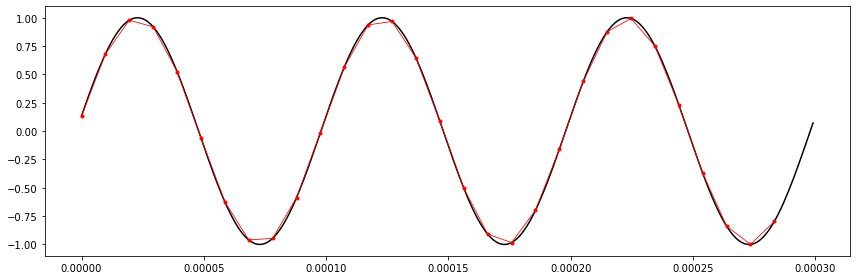

In [47]:
point = (fs//freq)*3
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(con_t, con_sin, '-', c='k')
ax.plot(dis_t[:point], dis_sin[:point], '.-', c='r', lw=.8)
fig.tight_layout()

In [37]:
# input the array and output the rms data 
def rms(x):
    return np.sqrt(np.mean(x*x))

In [46]:
SPLpp = max(dis_sin)-min(dis_sin)
print("SPLpp error: {}".format(SPLpp-2))
SPLrms = rms(dis_sin[:(fs//freq)*3])
print("SPLrms*2*sqwt(2) error: {}".format(SPLrms*2*math.sqrt(2)-2))

SPLpp error: -0.0067030474574028
SPLrms*2*sqwt(2) error: 0.017409684446991758


In [88]:
# return pure sine wave(amp, freq, phase, cycle), continuous sine wave and discrete sine wave, 
# using the F/fdesired=100 to pretend the continuous sine wave
# set the fs=102400 in the discrete sine wave
# plus the gaussian noise
def sin_with_gaussian(amp=1, freq=5000, phase=0, cycles=10, fs=fs):
    ratio = 10
    phase = phase*180/np.pi
    con_F = 100*freq
    con_t = np.arange(0, con_F//freq*cycles)/con_F
    dis_F = fs
#     dis_t = np.arange(0, dis_F//freq*cycles)/dis_F
    
    np.random.seed(444)
    con_sin = amp*np.sin(np.pi*2*freq*con_t+phase) + amp/ratio*np.random.randn(len(con_t))
    mask = (np.arange(0, len(con_sin)//(con_F/dis_F))*(con_F/dis_F)).astype(np.int64)
    dis_sin = con_sin[mask]
    dis_t = con_t[mask]
#     dis_sin = amp*np.sin(np.pi*2*freq*dis_t+phase) + amp/ratio*np.random.randn(len(dis_t))
    snr = 10*np.log(ratio*ratio)
    return con_t, con_sin, dis_t, dis_sin, snr

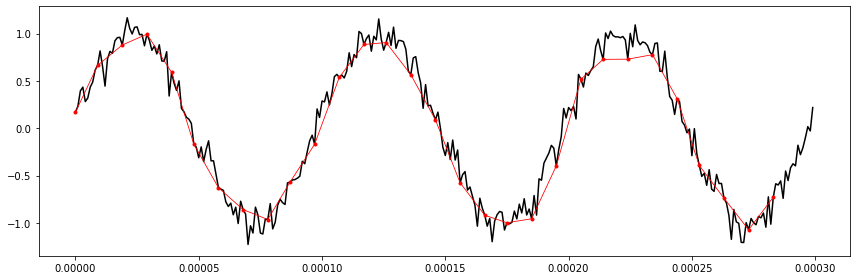

In [89]:
fs = 102400
freq = 10000
cycles = 3
phase = 17

con_t, con_sin, dis_t, dis_sin, snr = sin_with_gaussian(phase=phase, freq=freq, cycles=cycles, fs=fs)
point = (fs//freq)*3
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(con_t, con_sin, '-', c='k')
ax.plot(dis_t[:point], dis_sin[:point], '.-', c='r', lw=.8)
fig.tight_layout()

In [90]:
SPLpp = max(dis_sin)-min(dis_sin)
print("SNR: {} dB".format(snr))
print("SPLpp error: {}".format(SPLpp-2))
SPLrms = rms(dis_sin)
print("SPLrms*2*sqwt(2) error: {}".format(SPLrms*2*math.sqrt(2)-2))

SNR: 46.05170185988092 dB
SPLpp error: 0.06721361231334466
SPLrms*2*sqwt(2) error: -0.005361675979003833
